<a href="https://colab.research.google.com/github/Herrera00/CIENCIA-DATOS-2025/blob/main/Tarea_15_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###coffe_sales

In [1]:
!pip install statsmodels

In [2]:
!pip install wquantiles

In [8]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
cafeteria=pd.read_csv("/content/Coffe_sales.csv")
#primeros 5 datos
cafeteria.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [21]:
#ultimos 5 datos
cafeteria.tail(5)


,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000
3546,18,card,35.76,Latte,Night,Sun,Mar,7,3,2025-03-23,18:11:38.635000


In [22]:
#5 datos aleatorios
cafeteria.sample(5)

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
2621,9,card,25.96,Americano,Morning,Sat,Jan,6,1,2025-01-04,09:59:27.784000
2044,19,card,35.76,Cappuccino,Night,Mon,Oct,1,10,2024-10-28,19:10:25.255000
535,18,card,27.92,Americano,Night,Mon,May,1,5,2024-05-27,18:00:50.983000
789,21,card,37.72,Cappuccino,Night,Thu,Jun,4,6,2024-06-27,21:50:31.617000
2721,16,card,35.76,Hot Chocolate,Afternoon,Sat,Jan,6,1,2025-01-18,16:33:40.099000


In [23]:
#medidas de tendencia central
cafeteria.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


###Analisis de columnas del dataframa

In [24]:
#Variables
cafeteria.columns

Index(['hour_of_day', 'cash_type', 'money', 'coffee_name', 'Time_of_Day',
       'Weekday', 'Month_name', 'Weekdaysort', 'Monthsort', 'Date', 'Time'],
      dtype='object')

In [25]:
#variables y su naturaleza
cafeteria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


###Estimaciones

In [26]:
cafeteria.columns

Index(['hour_of_day', 'cash_type', 'money', 'coffee_name', 'Time_of_Day',
       'Weekday', 'Month_name', 'Weekdaysort', 'Monthsort', 'Date', 'Time'],
      dtype='object')

In [27]:
#media
cafeteria["money"].mean()

np.float64(31.64521567521849)

In [29]:
#mediana
cafeteria["money"].median()

32.82

In [30]:
#media truncada
trim_mean(cafeteria.money,0.1)

np.float64(31.978076787601267)

In [35]:
#media de hora del dia
cafeteria["hour_of_day"].mean()

np.float64(14.18579080913448)

In [37]:
#mediana ponderada con respecto al dinero
np.average(cafeteria["hour_of_day"], weights=cafeteria.money)

np.float64(14.318071856370649)

In [38]:
#media ponderada de hora del dia
wquantiles.median(cafeteria["hour_of_day"], weights=cafeteria.money)

np.float64(14.0)

<Axes: >

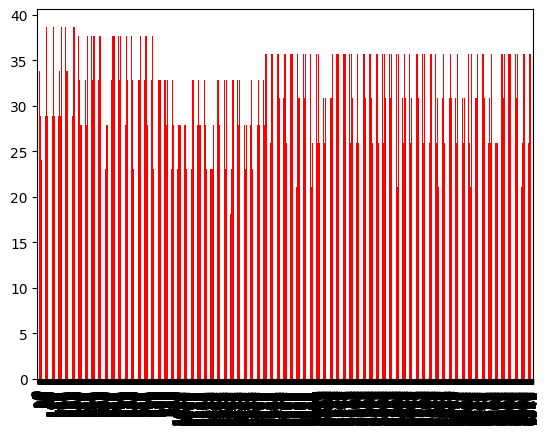

In [45]:
cafeteria["money"].plot.bar(color="red")

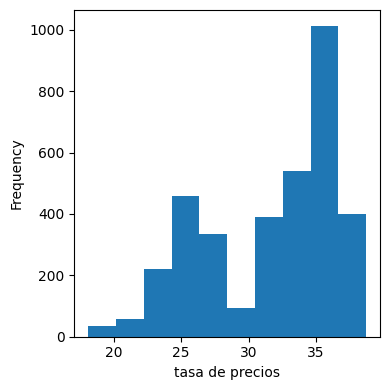

In [46]:
ax=(cafeteria["money"]).plot.hist(figsize=(4,4))
ax.set_xlabel("tasa de precios")
plt.tight_layout()
plt.show()

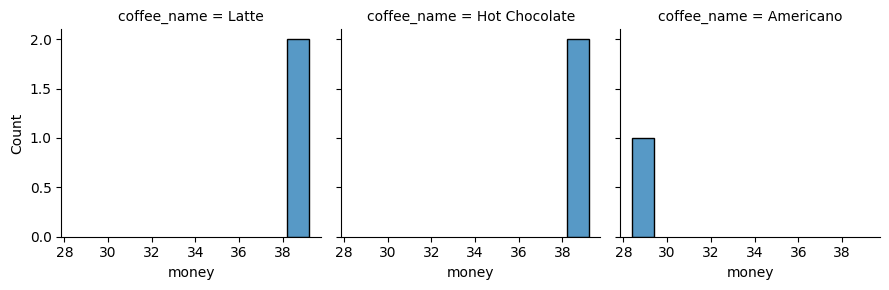

In [48]:
analisis=cafeteria.head()
g=sns.FacetGrid(analisis,col="coffee_name")
g.map(sns.histplot,"money")